## 1. Load the libraries

In [1]:
# Import Libararies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
# Import Standaradscalar, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Import train test split
from sklearn.model_selection import train_test_split
# for Mchine learning
#For Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
#For classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# import pipeline
from sklearn.pipeline import Pipeline
# import cross validation score
from sklearn.model_selection import cross_val_score
# import Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Import Deep Learning Libararies
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
# import Earlystopping
from tensorflow.keras.callbacks import EarlyStopping
# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Dataset

In [2]:
# Load the training dataset
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
# Load the testing dataset
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
# Load the testing dataset
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [3]:
df_train.head(5)

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df_test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [5]:
submission.head()

id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5

## 3. EDA Process

### 3.1 Overview of Dataset

Training Data(df_train) Discription:
- id: A unique identifier.
- CustomerId: A unique identifier for each customer.
- Surname: The surname of the customer.
- CreditScore: The credit score of the customer.
- Geography: The country where the customer resides.
- Gender: The gender of the customer.
- Age: The age of the customer.
- Tenure: The number of years the customer has been with the bank.
- Balance: The account balance of the customer.
- NumOfProducts:The number of bank products the customer uses (e.g., savings account, credit card)
- IsActiveMember: Whether the customer is an active member or not.
- EstimatedSalary: The estimated salary of the customer.
- Exited: Whether the customer has churned or not (Target Variable)

In [6]:
# Print dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
# Display Maximum Rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# Describe data
df_train.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [9]:
# datatype
# DataFrame 有一个方便的 dtypes 属性用于返回一个包含每个列的数据类型的序列
df_train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# Shape
df_train.shape

(165034, 14)

Observations:
- Training data consists of 165034 rows and 14 colomns.
- In it 6 columns are of int datatype such as id ,CustomerId, CreditScore, Tenure, NumOfProducts, Exited.
- In it 5 column are of float dtype such as Age, Balance, HasCrCard, IsActiveMember, EstimatedSalary.
- In it 3 columns are of object datatype such as Surname, Geography, Gender

In [11]:
# Lets check df_train columns
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 3.2 Mising values

In [12]:
df_train.isnull().sum().sort_values(ascending=True)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

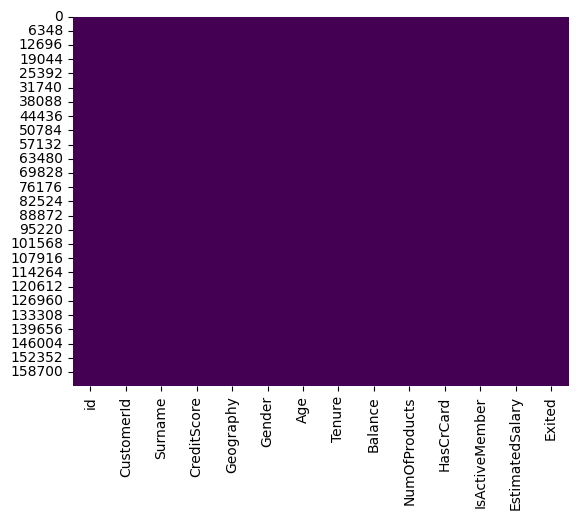

In [13]:
# check missing/null value by plotting
sns.heatmap(df_train.isnull(), cmap = 'viridis', cbar = False)

In [14]:
# Check for duplicate rows in the df_train dataset
df_train.duplicated().any()

False

Observations:
- There is no missing value in df_train
- There are also no duplicated rows.

### 3.3 Explore Each Column of Training Data

**3.3.1 Explore the ID column**

In [15]:
# Explore the ID column
df_train['id'].min(), df_train['id'].max()
print('The maximum id value present in Training Data is: ', df_train['id'].max())
print('The minimum id value present in Training Data is: ', df_train['id'].min())

The maximum id value present in Training Data is:  165033
The minimum id value present in Training Data is:  0


In [16]:
# Print the Mean, Median, Mode column of CustomerId
# Print the mode of customerId column
print('The mode of CustomerId column:', df_train['CustomerId'].mode()[0])
# Print the Mean of customerId column
print('The mean of CustomerId column:', df_train['CustomerId'].mean())
# Print the Median of customerId column
print('The median of CustomerId column is:', df_train['CustomerId'].median())


The mode of CustomerId column: 15682355
The mean of CustomerId column: 15692005.019026382
The median of CustomerId column is: 15690169.0


In [17]:
# Group by Gender
df_train.groupby('Gender')['CustomerId'].describe()

count          mean           std         min         25%  \
Gender                                                                
Female  71884.0  1.569216e+07  71258.047192  15565701.0  15633612.0   
Male    93150.0  1.569188e+07  71505.634060  15565701.0  15632850.0   

               50%         75%         max  
Gender                                      
Female  15690647.0  15756668.5  15815690.0  
Male    15689955.0  15756850.0  15815690.0

In [18]:
fig = px.histogram(df_train['CustomerId'], color = df_train['Gender'])
fig.show()

**3.3.2 Explore the Surname column**

In [19]:
# Display all unique surnames
unique_surnames = df_train['Surname'].unique()
print('The unique value of Surname column is: ', unique_surnames)
print('The total unique values of Surname column is: ', df_train['Surname'].nunique())

The unique value of Surname column is:  ['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']
The total unique values of Surname column is:  2797


In [20]:
# Group by gender
grouped_surname = df_train.groupby('Gender')['Surname'].describe()
grouped_surname

count unique   top  freq
Gender                          
Female  71884   2474  Hsia  1029
Male    93150   2556  Hsia  1427

In [21]:
fig = px.bar(grouped_surname, x = grouped_surname.index, y = 'count' )
fig.show()

**3.3.3 Explore the CreditScore column**

In [22]:
df_train['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

In [23]:
grouped_CreditScore = df_train.groupby('Gender')['CreditScore'].describe()
grouped_CreditScore

count        mean        std    min    25%    50%    75%    max
Gender                                                                   
Female  71884.0  656.243726  80.502500  350.0  597.0  659.0  710.0  850.0
Male    93150.0  656.616930  79.793996  350.0  598.0  660.0  710.0  850.0

In [24]:
fig = px.histogram(df_train['CreditScore'], color = df_train['Gender'])
fig.show()

**3.3.4 Explore the Geography column**

In [25]:
df_train['Geography'].describe()

count     165034
unique         3
top       France
freq       94215
Name: Geography, dtype: object

In [26]:
# calculate the sum of the columns
sum_geography = df_train.groupby('Geography').sum().reset_index()
sum_geography

Geography          id     CustomerId  \
0    France  7755624993  1478438659663   
1   Germany  2857253935   543016730438   
2     Spain  3005149133   568258966209   

                                             Surname  CreditScore  \
0  OkwudilichukwuOkwudiliolisaHsuehKaoCh'angManna...     61810753   
1  GenoveseCattaneoFokineChiuHargreavesTrentiniAk...     22733383   
2  ChiemenamChukwuebukaRossiUdegbulamSazonovaVasi...     23793155   

                                              Gender         Age  Tenure  \
0  MaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMale...  3543908.44  473671   
1  MaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMale...  1374869.00  172273   
2  MaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMale...  1373290.34  182585   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  3.519164e+09         149273    71591.0         47627.0     1.059767e+10   
1  4.195484e+09          50006    25947.0         16002.0     3.940696e+09   
2  1.441123e+09          57259    26890.0         18520.0     4.040305e+09   

   Exited  
0   15572  
1   13114  
2    6235

In [27]:
# Create a choropleth map using Plotly Express
fig = px.choropleth(sum_geography, locations='Geography', locationmode='country names',
                    color='CreditScore', hover_name='Geography',
                    title='Sum of CreditScore by Geography')

# Display the map
fig.show()

**3.3.4 Explore the Sex column**

In [28]:
df_train['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Count'>

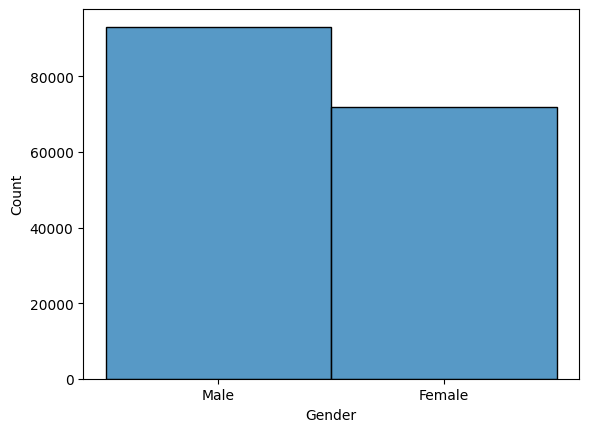

In [29]:
sns.histplot(df_train['Gender'])

In [30]:
male_count = 93150
female_count = 71884
total_count = male_count + female_count
percentage_male = (male_count / total_count) * 100
percentage_female = (female_count / total_count) * 100
print(f"The percentage of male is: {percentage_male:.2f}%")
print(f"The percentage of female is: {percentage_female:.2f}%")

different_percentage = percentage_male - percentage_female
print(f"percentage_male is {different_percentage: .2f}% more than female_percentage")

The percentage of male is: 56.44%
The percentage of female is: 43.56%
percentage_male is  12.89% more than female_percentage


**3.3.5 Explore the Age column**

In [31]:
df_train['Age'].describe()

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

In [32]:
df_train.groupby('Gender')['Age'].describe()

count       mean       std   min   25%   50%   75%   max
Gender                                                            
Female  71884.0  38.763207  9.124936  18.0  33.0  38.0  44.0  92.0
Male    93150.0  37.634068  8.631011  18.0  32.0  37.0  41.0  92.0

In [33]:
fig = px.histogram(df_train['Age'], color = df_train['Gender'])
fig.show()

**Feature Engineering and create the binned_Age column**

In [34]:
bins = [18, 40, 60, 75, 90]
labels = ['Adult', 'Middle_aged', 'older', 'oldest']
df_train['binned_Age'] = pd.cut(df_train['Age'], bins = bins, labels = labels)
df_train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited binned_Age  
0       0      Adult  
1       0      Adult  
2       0      Adult  
3       0      Adult  
4       0      Adult

In [35]:
df_train['binned_Age'].sample(5)

124623          Adult
91150     Middle_aged
47045     Middle_aged
82495           Adult
39991           Adult
Name: binned_Age, dtype: category
Categories (4, object): ['Adult' < 'Middle_aged' < 'older' < 'oldest']

In [36]:
print('The binned_Age column percentage is:', df_train['binned_Age'].isnull().sum()/len(df_train)*100)

The binned_Age column percentage is: 0.0781657113079729


In [37]:
df_train['binned_Age'].isnull().sum()

129

In [38]:
df_train['binned_Age'].fillna(df_train['binned_Age'].mode()[0], inplace=True)

In [39]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
binned_Age         0
dtype: int64

**3.3.6 Explore the tenure column**

In [40]:
df_train['Tenure'].describe()

count    165034.000000
mean          5.020353
std           2.806159
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

In [41]:
df_train.groupby('Gender')['Tenure'].describe()

count      mean       std  min  25%  50%  75%   max
Gender                                                       
Female  71884.0  4.992349  2.811852  0.0  3.0  5.0  7.0  10.0
Male    93150.0  5.041965  2.801581  0.0  3.0  5.0  7.0  10.0

In [42]:
fig = px.histogram(df_train['Tenure'], color = df_train['Gender'])
fig.show()

Observations:
- The Female count of df_train is 71884.0
- The Male count of df_train is 93150.0
- The Maximum Tenure of Male and Female is 10 Years

**3.3.7 Explore the Balance column**

In [43]:
df_train['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

In [44]:
fig = px.histogram(df_train['Age'], color = df_train['Gender'])
fig.show()

**3.3.8 Explore the NumOfProducts column**

In [45]:
df_train['NumOfProducts'].describe()

count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64

In [46]:
fig = px.histogram(df_train, x = 'Geography', color = 'NumOfProducts')
fig.show()

Observations:
- The Maximum NoOfProducts in df_train is 4.000000
- The Minimum NoOfProducts in df_train is 1.000000

**3.3.9 Explore the HasCrCard column**

In [47]:
df_train['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [48]:
fig = px.histogram(df_train['HasCrCard'], color = df_train['Geography'])
fig.show()

- 124428 people don't have HasCrCard
- 40606 people have HasV=CrCard
- 8659 people in Germany don't have HasCrCard
- 25947 people in Germany have HasCrCard
- 9323 people in Spain don't have HasCrCard
- 26890 people in Spain have HasCrCard
- 22624 people in France don't have HasCrCard
- 71591 people in France have HasCrCard


**3.3.10 Explore the IsActiveMember column**

In [49]:
df_train['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

In [50]:
fig = px.histogram(df_train['IsActiveMember'], color = df_train['Geography'])
fig.show()

- 82885 people donot IsActiveMember
- 82149 people are IsActiveMember
- 16.002k people are IsActiveMember in Germany
- 18.52k people are IsActiveMember in Span
- 47.626 people are IsActiveMember in France
- 18.604k people donot IsActiveMember in Germany
- 17.693k people donot IsActiveMember in Span
- 46.588k people donot IsActiveMember in France

**3.3.11 Explore the EstimatedSalary Column**

In [51]:
df_train['EstimatedSalary'].describe()

count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [52]:
fig = px.histogram(df_train['EstimatedSalary'], color = df_train['Gender'])
fig.show()

- The Maximum Estimated salary of Male and Female is 199992.48k
- The Minimum Estimatedsalary of Male and Female is 11.58k

**3.3.12 Explore the Exited Column**

In [53]:
df_train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [54]:
df_train.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         51779
        1         20105
Male    0         78334
        1         14816
Name: count, dtype: int64

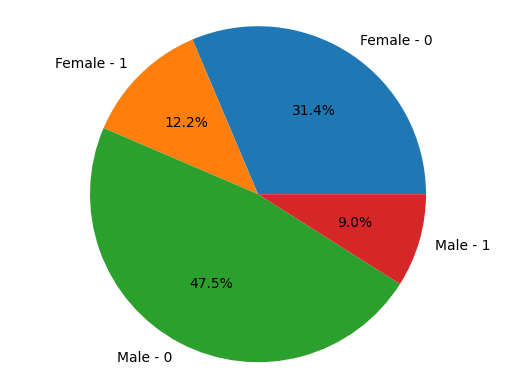

In [55]:
grouped_data = df_train.groupby('Gender')['Exited'].value_counts()

labels = []
values = []

for key, value in grouped_data.items():
    gender, exited = key
    labels.append(f"{gender} - {exited}")
    values.append(value)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [56]:
fig = px.histogram(df_train['Exited'], color = df_train['Gender'])
fig.show()

- 51779 Female donot Exited or is still active member
- 20105 Female have been Exited
- 78334 Male donot Exited or is still active member
- 14816 Male have been Exited

In [57]:
df = df_train.copy()

In [58]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited binned_Age  
0       0      Adult  
1       0      Adult  
2       0      Adult  
3       0      Adult  
4       0      Adult

In [59]:
# 区分类别变量categorical features和数值变量numerical features
cate_cols = ['Surname', 'Geography', 'Gender', 'Tenure', 'binned_Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

**make the distplot of Numerical columns to check the distribution using sns and kde=True**

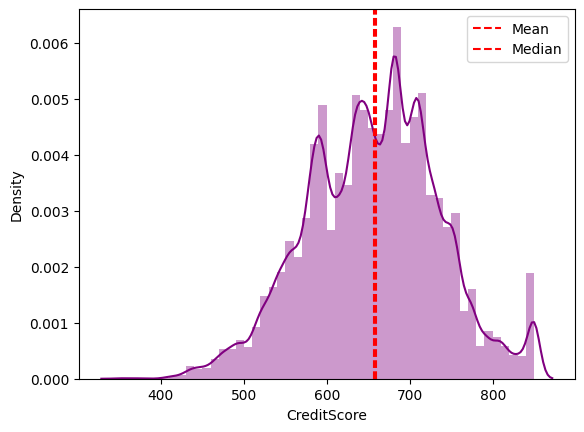

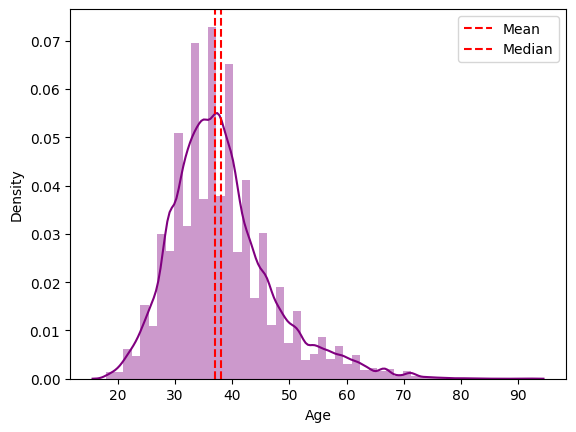

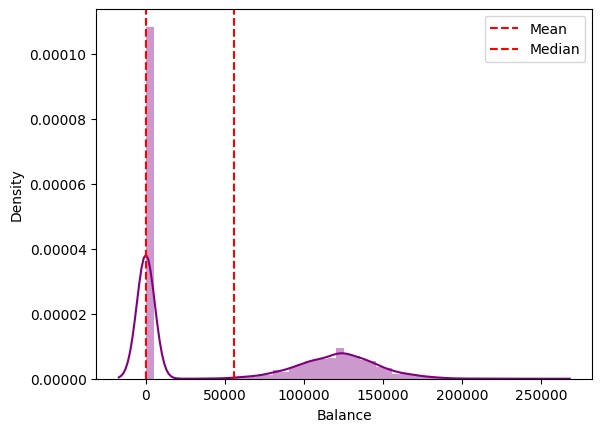

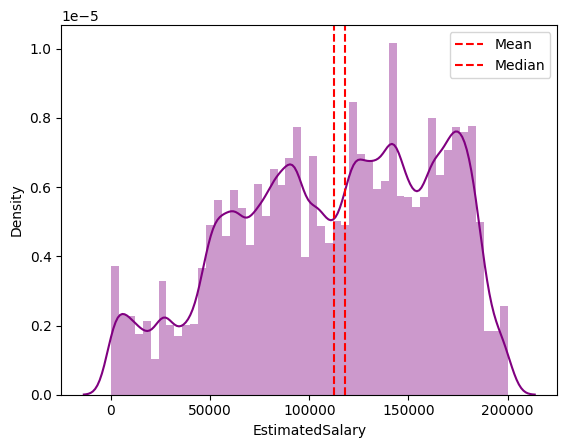

In [60]:
# displot of numeric columns
for col in num_cols:
    sns.distplot(df[col], kde = True, color = 'purple')
    # add the Mean and Median line in each plot
    plt.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean')
    plt.axvline(df[col].median(), color = 'r', linestyle = '--', label = 'Median')
    plt.legend()
    plt.show()

## 4. Data Processing
**4.1 scaling** 

In [61]:
scalar = StandardScaler()
df[num_cols] = scalar.fit_transform(df[num_cols])

**4.2 Transformation**

In [62]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
pt_boxcox=PowerTransformer(standardize=True)
df[num_cols]=pt_boxcox.fit_transform(df[num_cols])
pt_yeojohnson=PowerTransformer(standardize=True)
df[num_cols]=pt_yeojohnson.fit_transform(df[num_cols])
qt_normal=QuantileTransformer(output_distribution='normal', random_state=42)
df[num_cols]=qt_normal.fit_transform(df[num_cols])

In [63]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Geography']=le.fit_transform(df['Geography'])
df['binned_Age']=le.fit_transform(df['binned_Age'])

In [64]:
df.head()

id  CustomerId         Surname  CreditScore  Geography  Gender       Age  \
0   0    15674932  Okwudilichukwu     0.116941          0       1 -0.556927   
1   1    15749177   Okwudiliolisa    -0.384375          0       1 -0.556927   
2   2    15694510           Hsueh     0.212353          0       1  0.391137   
3   3    15741417             Kao    -0.901416          0       1 -0.414267   
4   4    15766172       Chiemenam     0.798769          2       1 -0.556927   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3 -5.199338              2        1.0             0.0   
1       1 -5.199338              2        1.0             1.0   
2      10 -5.199338              2        1.0             0.0   
3       2  1.606171              1        1.0             1.0   
4       5 -5.199338              2        1.0             1.0   

   EstimatedSalary  Exited  binned_Age  
0         1.555273       0           0  
1        -1.181096       0           0  
2         1.762231       0           0  
3        -0.503657       0           0  
4        -1.767466       0           0

## 5. Deep Learning (Neural Network)

In [65]:
# Select the features and lables
X = df.drop(['Exited', 'id', 'CustomerId', 'Surname'], axis = 1)
Y = df['Exited']

In [66]:
X.head()

CreditScore  Geography  Gender       Age  Tenure   Balance  NumOfProducts  \
0     0.116941          0       1 -0.556927       3 -5.199338              2   
1    -0.384375          0       1 -0.556927       1 -5.199338              2   
2     0.212353          0       1  0.391137      10 -5.199338              2   
3    -0.901416          0       1 -0.414267       2  1.606171              1   
4     0.798769          2       1 -0.556927       5 -5.199338              2   

   HasCrCard  IsActiveMember  EstimatedSalary  binned_Age  
0        1.0             0.0         1.555273           0  
1        1.0             1.0        -1.181096           0  
2        1.0             0.0         1.762231           0  
3        1.0             1.0        -0.503657           0  
4        1.0             1.0        -1.767466           0

In [67]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [68]:
# split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [69]:
# Create a Deep Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = [X_train.shape[1]]), # 输入层
    tf.keras.layers.Dense(32, activation = 'relu'), # 隐藏层
    tf.keras.layers.Dense(16, activation = 'relu'), # 隐藏层
    tf.keras.layers.Dense(8, activation = 'relu'), # 隐藏层
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 输出层
])
# Early stopping 防止过拟合
early_stopping = EarlyStopping(patience = 15)
# Compile the model 编译模型
# 使用Adam优化器，二分类交叉熵，适用于 二分类任务，训练过程中监控 准确率（accuracy）
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# train the model, 最大训练轮次 epochs = 100
# batch_size = 32, 每次训练32个样本，使用小批量梯度下降
# validation_data = (X_test, y_test) 每轮训练后在测试集上评估性能
# callbacks=[early_stopping] 如果val_loss 15轮没下降停止训练
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1, validation_data = (X_test, y_test), callbacks = [early_stopping])




Epoch 1/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8326 - loss: 0.3850 - val_accuracy: 0.8600 - val_loss: 0.3314
Epoch 2/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8598 - loss: 0.3319 - val_accuracy: 0.8604 - val_loss: 0.3296
Epoch 3/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8610 - loss: 0.3295 - val_accuracy: 0.8617 - val_loss: 0.3270
Epoch 4/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8643 - loss: 0.3253 - val_accuracy: 0.8642 - val_loss: 0.3220
Epoch 5/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8633 - loss: 0.3275 - val_accuracy: 0.8646 - val_loss: 0.3236
Epoch 6/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8628 - loss: 0.3268 - val_accuracy: 0.8643 - val_loss: 0.3245
Epoch 7/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8645 - loss: 0.3233 - val_accuracy: 0.8637 - val_loss: 0.3218
Epoch 8/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8629 -

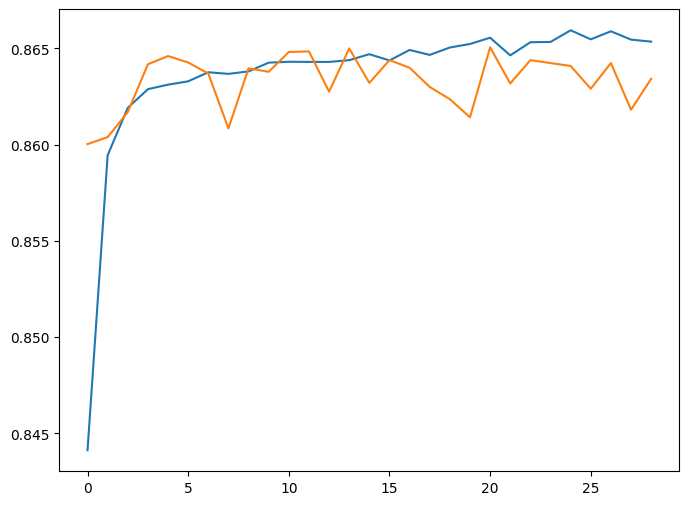

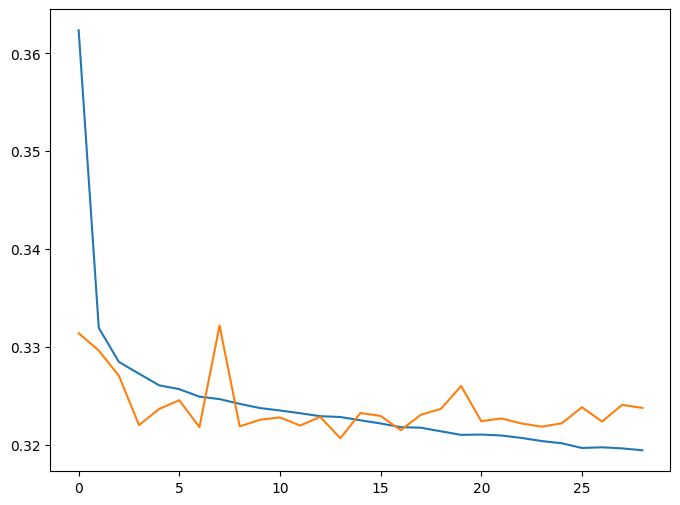

In [70]:
# plot the accuracy and validation accuracy
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(history.history['accuracy'], label = 'Training accuracy')
ax.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.show()
# plot the Training and Validation loss
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
plt.show()

## 6. XGBClassifier

In [71]:
from xgboost import XGBClassifier
# 训练XGboost分类模型
# Call the Model 初始化XGBoost分类器
xgb = XGBClassifier()
# Train the model
xgb.fit(X_train, y_train)
# predict the model
y_pred = xgb.predict(X_test)
# 使用 GridSearchCV 进行超参数调优
from sklearn.model_selection import GridSearchCV

# 定义超参数网格
param_grid = {
    'n_estimators': [100, 200, 300], # 决策树的数量
    'max_depth': [3, 4, 5], #树的最大深度
    'learning_rate':[0.1, 0.01, 0.001] #学习率
}
# 使用GridSearchCV自动选择最优超参数
grid_search = GridSearchCV(estimator = XGBClassifier(),
                           param_grid = param_grid,
                           cv = 3, # 3折交叉验证
                          )
# 训练
grid_search.fit(X_train, y_train)

# 输出最佳参数
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Creat a new XGBoost classifier with the best parameters
xgb = XGBClassifier(**best_params)

# Train the model with the updated hyperparameters
xgb.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) # 计算准确率
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy", accuracy)





Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Cross-Validation Score: 0.865269982655063
Test Set Accuracy 0.8685127397218771


In [72]:
# Evaluate the model
print('precision_score:', precision_score(y_test, y_pred, average = 'micro'))
print('recall_score:', recall_score(y_test, y_pred, average = 'micro'))
print('f1_score:', f1_score(y_test, y_pred, average = 'micro'))
print('classification_report:\n', classification_report(y_test, y_pred))
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))

precision_score: 0.8685127397218771
recall_score: 0.8685127397218771
f1_score: 0.868512739721877
classification_report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007

confusion_matrix:
 [[24791  1261]
 [ 3079  3876]]


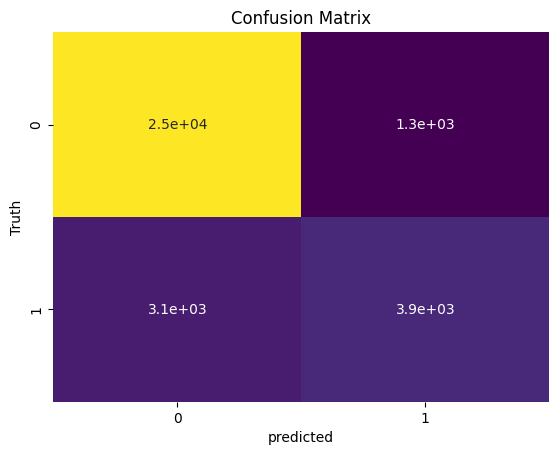

In [73]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
sns.heatmap(cm, annot = True, cbar = False, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

### Creating Submission File 1

In [74]:
from sklearn.preprocessing import LabelEncoder

# Apply binning to Age column in the test dataset
df_test['binned_Age'] = pd.cut(df_test['Age'], bins = [18, 40, 60, 75, 90],
                               labels = ['Adult', 'Middle_aged', 'older', 'oldest'])

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# Drop unnecessary columns from the test dataset
df_test.drop(['id', 'CustomerId', 'Surname'], axis = 1, inplace = True)

# Predict the test data and creat a submission file of probability of each class
y_pred = xgb.predict_proba(df_test)
submission['Exited'] = y_pred[:, 1]


In [75]:
submission.to_csv('submission_bank_churn1.csv', index=False)

## 7. Hyperparameter tuning of XGBClassifier

In [76]:
# call the models
models = {
    'Logistic Regression': (LogisticRegression(random_state = 42), {}),
    'KNN': (KNeighborsClassifier(), {'model_n_neighbors': [10, 30]}),
    'SVC': (SVC(random_state = 42), {'model_gamma': ['scale', 'auto']}),
    'DecisionTreeClassier':(DecisionTreeClassifier(random_state = 42), {'model_max_depth': [5, 10, 15]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state = 42), {'model_n_estimators': [100, 200, 300], 'model_max_depth': [5, 10, 15]}),
    'GradientBoostClassifier': (GradientBoostingClassifier(random_state = 42), {'model_learning_rate': [0.1, 0.01, 0.001]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state = 42), {'model_n_estimators': [50, 100, 200]}),
    'XGBClassifier': (XGBClassifier(random_state = 42), {'model_max_depth': [3, 4, 5]}),
    'Native Bayes': (GaussianNB(), {})
}
best_model = None
best_accuracy = 0
for name, (models, params) in models.items():
    pipeline = Pipeline(steps = [('model', models)])
    # Apply the cross validation score
    scores = cross_val_score(pipeline, X_train, y_train, cv = 5, verbose = 0)
    # mean_accuracy
    mean_accuracy = scores.mean()
    # predict the pipeline
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print the evaluation metrics
    print('Model', name)
    print('Cross_validation accuracy', mean_accuracy)
    print('accuracy', accuracy)
    print('\n')

    # Evaluate the model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# print the best model
print("Best Model is:", best_model)

Model Logistic Regression
Cross_validation accuracy 0.8287093037719604
accuracy 0.8278546974884116


Model KNN
Cross_validation accuracy 0.8380483003789614
accuracy 0.8399127457811979


Model SVC
Cross_validation accuracy 0.8471979389098404
accuracy 0.8480019389826401


Model DecisionTreeClassier
Cross_validation accuracy 0.7944966166603871
accuracy 0.7955888144938952


Model RandomForestClassifier
Cross_validation accuracy 0.8578397030174653
accuracy 0.8579998182203775


Model GradientBoostClassifier
Cross_validation accuracy 0.8636567065293885
accuracy 0.8655436725543066


Model AdaBoostClassifier
Cross_validation accuracy 0.8599529141918205
accuracy 0.8628169782167419


Model XGBClassifier
Cross_validation accuracy 0.8636415461228184
accuracy 0.8651498167055474


Model Native Bayes
Cross_validation accuracy 0.8218925105575051
accuracy 0.8201593601357288


Best Model is: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
from sklearn.preprocessing import LabelEncoder

# Apply binning to Age column in the test dataset
df_test['binned_Age'] = pd.cut(df_test['Age'], bins=[18, 40, 60, 75, 90],
labels=['Adult', 'Middle_aged', 'older', 'oldest'])

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# Predict the test data and create a submission file of probability of each class
y_pred = xgb.predict_proba(df_test)
submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)